# <b>CV0003: Introduction to Data Science and Artificial Intelligence Mini Project</b>

<b> Group Member:</b>
1.  ()
2.  ()
3.  ()
4.  ()
5.  ()
---

## <b>A. Problem Introduction</b>

- **Title:**   

- **Objective:**   

- **Motivation:**   

- **Research Questions:**   


## <b>B. Data Extraction</b>
In this project, we use the API provided by DataMall to extract the real-time data.

Based on the description:
> From the dataset, important features may use:
- `timestamp`: time when the data was being extracted
- `carpark_id`: the carpark id
- `area`: where the carpark located
- `development`: what the carpark name
- `latitude`: latitude position
- `longitude`: longitude position
- `available_lots`: available lots during that time
- `lot_type`: the type of lot
- `agency`: who built the lot

> Use the `carpark_collector.py` file

## <b>C. Data Preparation</b>


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Combine the dataset into one dataframe
dir_path = r"C:\Personal Project\parking-availability\src\raw"
result_folder = r"C:\Personal Project\parking-availability\src\processed"

# Create an empty list to store dataframes
data_frames = []

# Loop through all the files in the directory
for filename in os.listdir(dir_path):
    if filename.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(dir_path, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        data_frames.append(df)  # Add the DataFrame to the list

# Concatenate all DataFrames
combined_df = pd.concat(data_frames, ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
output_file = 'combined_file.csv'
os.makedirs(result_folder, exist_ok=True)
combined_df.to_csv(os.path.join(result_folder, output_file), index=False)

In [3]:
final_df = pd.read_csv (r"C:\Personal Project\parking-availability\src\processed\combined_file.csv")
final_df.sample(10) # random sample

,timestamp,carpark_id,area,development,latitude,longitude,available_lots,lot_type,agency
940,2025-10-28 20:16:40,T9,NaN,BLK 140/148 TAMPINES STREET 12,1.347816,103.943647,213,C,HDB
4411,2025-10-29 08:39:37,B40,NaN,BLK 504/508 BEDOK NORTH STREET 3,1.332550,103.932770,18,C,HDB
7226,2025-10-30 02:25:15,T8,NaN,BLK 137/139 TAMPINES STREET 11,1.346414,103.944190,162,C,HDB
9190,2025-10-30 09:26:31,T1,NaN,BLK 101/108 TAMPINES STREET 11,1.347571,103.946943,250,C,HDB
5135,2025-10-29 11:09:49,B44,NaN,BLK 528/536 BEDOK NORTH STREET 3,1.333971,103.927509,766,C,HDB
7919,2025-10-30 04:45:37,B44,NaN,BLK 528/536 BEDOK NORTH STREET 3,1.333971,103.927509,405,C,HDB
4534,2025-10-29 09:09:39,T1,NaN,BLK 101/108 TAMPINES STREET 11,1.347571,103.946943,251,C,HDB
9634,2025-10-30 10:56:39,B26,NaN,BLK 98/100 BEDOK NORTH AVENUE 4,1.334308,103.940341,148,C,HDB
622,2025-10-28 19:06:28,B42,NaN,BLK 509/511 BEDOK NORTH STREET 3,1.332452,103.930821,23,C,HDB
6724,2025-10-29 23:42:36,B49,NaN,BLK 549/551 BEDOK NORTH AVENUE 1,1.332186,103.926668,59,C,HDB


In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       10480 non-null  object 
 1   carpark_id      10480 non-null  object 
 2   area            223 non-null    object 
 3   development     10480 non-null  object 
 4   latitude        10480 non-null  float64
 5   longitude       10480 non-null  float64
 6   available_lots  10480 non-null  int64  
 7   lot_type        10480 non-null  object 
 8   agency          10480 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 737.0+ KB


In [5]:
# Analyze unique for area column
area_unique = final_df['area'].unique()
area_unique

array(['Others', nan], dtype=object)

Based on this result, we can conclude that area column won't give any significant information to us. Therefore, we decide to take out from out dataframe.

In [6]:
final_df.drop (columns=['area'], inplace=True)

In [7]:
final_df

,timestamp,carpark_id,development,latitude,longitude,available_lots,lot_type,agency
0,2025-10-27 16:27:27,63,Tampines Mall,1.352524,103.944700,384,C,LTA
1,2025-10-27 16:27:27,P0109,PASIR RIS PARK CAR PARK E OFF STREET,1.384596,103.943893,0,C,URA
2,2025-10-27 16:27:27,P0109,PASIR RIS PARK CAR PARK E OFF STREET,1.384596,103.943893,6,Y,URA
3,2025-10-27 16:27:27,T1,BLK 101/108 TAMPINES STREET 11,1.347571,103.946943,261,C,HDB
4,2025-10-27 16:27:27,T3,BLK 109/114 TAMPINES STREET 11,1.346641,103.947442,178,C,HDB
...,...,...,...,...,...,...,...,...
10475,2025-10-30 15:32:49,B85,BLK 184 BEDOK NORTH ROAD,1.326080,103.941358,458,C,HDB
10476,2025-10-30 15:32:49,B86,BLK 114A BEDOK NORTH STREET 2,1.330767,103.935691,95,C,HDB
10477,2025-10-30 15:32:49,B89,BLK 116A BEDOK NORTH ROAD,1.330959,103.937265,169,C,HDB
10478,2025-10-30 15:32:49,B8B,BLK 222 BEDOK NORTH DRIVE,1.324792,103.927947,168,C,HDB


Since the Dtype for every column 

In [8]:
final_df["timestamp"] = pd.to_datetime(final_df["timestamp"], format="%Y-%m-%d %H:%M:%S")
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       10480 non-null  datetime64[ns]
 1   carpark_id      10480 non-null  object        
 2   development     10480 non-null  object        
 3   latitude        10480 non-null  float64       
 4   longitude       10480 non-null  float64       
 5   available_lots  10480 non-null  int64         
 6   lot_type        10480 non-null  object        
 7   agency          10480 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 655.1+ KB


In [9]:
final_df.sample (20)

,timestamp,carpark_id,development,latitude,longitude,available_lots,lot_type,agency
8301,2025-10-30 06:05:41,B42,BLK 509/511 BEDOK NORTH STREET 3,1.332452,103.930821,74,C,HDB
7192,2025-10-30 02:05:02,B33,BLK 131/133 BEDOK NORTH AVENUE 3,1.327241,103.935800,64,C,HDB
10198,2025-10-30 12:56:52,T1,BLK 101/108 TAMPINES STREET 11,1.347571,103.946943,258,C,HDB
5387,2025-10-29 11:59:55,B85,BLK 184 BEDOK NORTH ROAD,1.326080,103.941358,446,C,HDB
6107,2025-10-29 16:35:52,B85,BLK 184 BEDOK NORTH ROAD,1.326080,103.941358,440,C,HDB
3631,2025-10-29 05:59:28,B21,BLK 74/82 BEDOK NORTH ROAD,1.328178,103.941046,221,C,HDB
7485,2025-10-30 03:15:31,B42,BLK 509/511 BEDOK NORTH STREET 3,1.332452,103.930821,82,C,HDB
5311,2025-10-29 11:49:54,B21,BLK 74/82 BEDOK NORTH ROAD,1.328178,103.941046,400,C,HDB
8943,2025-10-30 08:26:11,B94,BLK 513A BEDOK NORTH AVENUE 2,1.332260,103.929357,327,C,HDB
2913,2025-10-29 03:29:08,B25,BLK 91/97 BEDOK NORTH AVENUE 4,1.332969,103.940490,0,C,HDB


After we have come up with the final data, we want to check the data regularity based on the timestamp

In [10]:
final_df[final_df["development"] == "Tampines Mall"].tail (20)

,timestamp,carpark_id,development,latitude,longitude,available_lots,lot_type,agency
9520,2025-10-30 10:36:37,63,Tampines Mall,1.352524,103.9447,518,C,LTA
9568,2025-10-30 10:46:38,63,Tampines Mall,1.352524,103.9447,496,C,LTA
9616,2025-10-30 10:56:39,63,Tampines Mall,1.352524,103.9447,479,C,LTA
9664,2025-10-30 11:06:40,63,Tampines Mall,1.352524,103.9447,460,C,LTA
9712,2025-10-30 11:16:41,63,Tampines Mall,1.352524,103.9447,433,C,LTA
9760,2025-10-30 11:26:41,63,Tampines Mall,1.352524,103.9447,416,C,LTA
9808,2025-10-30 11:36:43,63,Tampines Mall,1.352524,103.9447,389,C,LTA
9856,2025-10-30 11:46:44,63,Tampines Mall,1.352524,103.9447,374,C,LTA
9904,2025-10-30 11:56:46,63,Tampines Mall,1.352524,103.9447,346,C,LTA
9952,2025-10-30 12:06:47,63,Tampines Mall,1.352524,103.9447,328,C,LTA


After we analyze the timestamp, we found out that the data doesn't have the same time gap. Consequestly, it will effect the time series

In [11]:
print (f"Car Park: {final_df["carpark_id"].nunique()}")
print (f"Unique timestamp: {final_df["timestamp"].nunique()}")

Car Park: 47
Unique timestamp: 225


In [12]:
unique_carparks = final_df[['carpark_id', 'lot_type']].drop_duplicates()
print(f"Found {len(unique_carparks)} car park-lot type combinations")

Found 48 car park-lot type combinations


In [13]:
resampled_dfs = []
    
# Step 3: Process each car park separately
for idx, row in unique_carparks.iterrows():
    carpark_id = row['carpark_id']
    lot_type = row['lot_type']
    
    # Filter data for this specific car park and lot type
    carpark_data = final_df[
        (final_df['carpark_id'] == carpark_id) & 
        (final_df['lot_type'] == lot_type)
    ].copy().sort_values('timestamp')
    
    # Get the first and last timestamp for this car park
    # This ensures we only create intervals within the monitoring period
    first_timestamp = carpark_data['timestamp'].iloc[0]
    last_timestamp = carpark_data['timestamp'].iloc[-1]
    
    # Create 10-minute time grid only for this car park's monitoring period
    # Floor the start and ceil the end to nearest 10 minutes
    time_grid_start = first_timestamp.floor('10min')
    time_grid_end = last_timestamp.ceil('10min')
    
    # Set timestamp as index for resampling
    carpark_data = carpark_data.set_index('timestamp')
    
    # Resample to 10-minute intervals
    # This creates a regular time grid and aligns existing data to it
    resampled = carpark_data.resample('10min').mean(numeric_only=True)
    
    # Interpolate the available_lots using linear interpolation
    # This estimates values between known data points
    # Example: 100 lots at 2:00, 80 lots at 2:20 → ~90 lots at 2:10
    resampled['available_lots'] = resampled['available_lots'].interpolate(
        method='linear'
    )
    
    # Round to nearest integer (can't have fractional parking spaces)
    resampled['available_lots'] = resampled['available_lots'].round().astype(int)
    
    # Reset index to get timestamp back as a column
    resampled = resampled.reset_index()
    
    # Add back the static columns that don't change over time
    resampled['carpark_id'] = carpark_id
    resampled['lot_type'] = lot_type
    resampled['development'] = carpark_data['development'].iloc[0]
    resampled['agency'] = carpark_data['agency'].iloc[0]
    resampled['latitude'] = carpark_data['latitude'].iloc[0]
    resampled['longitude'] = carpark_data['longitude'].iloc[0]
    
    # Add to the list of resampled dataframes
    resampled_dfs.append(resampled)

In [14]:
resampled_df = pd.concat(resampled_dfs, ignore_index=True)
    
# Sort by timestamp, then car park ID
resampled_df = resampled_df.sort_values(['timestamp', 'carpark_id', 'lot_type'])

# Reorder columns to match original structure
resampled_df = resampled_df[[
    'timestamp', 'carpark_id', 'development', 'latitude', 
    'longitude', 'available_lots', 'lot_type', 'agency'
]]

In [15]:
resampled_df[resampled_df["development"] == "Tampines Mall"]

,timestamp,carpark_id,development,latitude,longitude,available_lots,lot_type,agency
0,2025-10-27 16:20:00,63,Tampines Mall,1.352524,103.9447,384,C,LTA
1,2025-10-27 16:30:00,63,Tampines Mall,1.352524,103.9447,394,C,LTA
2,2025-10-27 16:40:00,63,Tampines Mall,1.352524,103.9447,381,C,LTA
3,2025-10-27 16:50:00,63,Tampines Mall,1.352524,103.9447,369,C,LTA
4,2025-10-27 17:00:00,63,Tampines Mall,1.352524,103.9447,369,C,LTA
...,...,...,...,...,...,...,...,...
423,2025-10-30 14:50:00,63,Tampines Mall,1.352524,103.9447,331,C,LTA
424,2025-10-30 15:00:00,63,Tampines Mall,1.352524,103.9447,331,C,LTA
425,2025-10-30 15:10:00,63,Tampines Mall,1.352524,103.9447,331,C,LTA
426,2025-10-30 15:20:00,63,Tampines Mall,1.352524,103.9447,331,C,LTA


After being resampled using mean, the data are ready to explore.

## <b>D. Exploratory Data Analysis</b>


#### Phase 1: All Car Parks Aggregate Analysis

1.1 Statistical Analysis

In [16]:
stats_list = []

for carpark_id in resampled_df["carpark_id"].unique():
    metadata = resampled_df[resampled_df["carpark_id"] == carpark_id]

    # Basic statistics
    mean_avail = metadata["available_lots"].mean()
    median_avail = metadata["available_lots"].median()
    std_avail = metadata["available_lots"].std()
    max_avail = metadata["available_lots"].max()
    min_avail = metadata["available_lots"].min()

    # Capacity estimation (assume)
    capacity_est = max_avail

    # Utilization metrics
    percentage_full = (metadata["available_lots"] == 0).sum() / len(metadata) * 100
    average_occupancy_rate = (1 - mean_avail / capacity_est) * 100 if capacity_est > 0 else 0
    average_occupancy = (average_occupancy_rate / 100) * capacity_est

    # Volatility measure
    coefficient_of_variation = (std_avail / mean_avail) * 100 if mean_avail > 0 else 0

    # Peak hour analysis
    metadata['hour'] = metadata['timestamp'].dt.hour
    hourly_average = metadata.groupby('hour')['available_lots'].mean()
    peak_hour = hourly_average.idxmin()
    peak_hour_avg_avail = hourly_average.min()

    # Trend anlysis (positive = getting emptier, negative = getting fuller)
    metadata_sorted = metadata.sort_values('timestamp').reset_index(drop=True)
    if len (metadata_sorted) > 1:
        x = np.arange(len(metadata_sorted))
        y = metadata_sorted['available_lots'].values
        trend_slope = np.polyfit(x, y, 1)[0]
    else:
        trend_slope = 0
    
    # Get other attributes
    development = metadata['development'].iloc[0]
    agency = metadata['agency'].iloc[0]
    latitude = metadata['latitude'].iloc[0]
    longitude = metadata['longitude'].iloc[0]
    num_records = len(metadata)


    stats_list.append({
        'carpark_id': carpark_id,
        'development': development,
        'agency': agency,
        'latitude': latitude,
        'longitude': longitude,
        'mean_available_lots': mean_avail,
        'median_available_lots': median_avail,
        'std_available_lots': std_avail,
        'max_available_lots': max_avail,
        'min_available_lots': min_avail,
        'capacity_estimation': capacity_est,
        'percentage_time_full': percentage_full,
        'average_occupancy': average_occupancy,
        'average_occupancy_rate (%)': average_occupancy_rate,
        'coefficient_of_variation (%)': coefficient_of_variation,
        'peak_hour': peak_hour,
        'peak_hour_avg_available_lots': peak_hour_avg_avail,
        'trend_slope': trend_slope
    })

In [17]:
# Create DataFrame
stats_df = pd.DataFrame(stats_list)
stats_df.sort_values("average_occupancy", ascending=False, inplace=True)
stats_df.head(10)

,carpark_id,development,agency,latitude,longitude,mean_available_lots,median_available_lots,std_available_lots,max_available_lots,min_available_lots,capacity_estimation,percentage_time_full,average_occupancy,average_occupancy_rate (%),coefficient_of_variation (%),peak_hour,peak_hour_avg_available_lots,trend_slope
23,B40,BLK 504/508 BEDOK NORTH STREET 3,HDB,1.332550,103.932770,213.084211,282.0,179.594771,519,0,519,25.263158,305.915789,58.943312,84.283472,4,138.916667,1.660908
38,B79,BLK 772A BEDOK RESERVOIR VIEW,HDB,1.336776,103.937407,1106.943860,1110.0,195.545509,1373,767,1373,0.000000,266.056140,19.377723,17.665350,1,843.750000,0.932574
27,B44,BLK 528/536 BEDOK NORTH STREET 3,HDB,1.333971,103.927509,581.705263,582.0,138.268152,774,398,774,0.000000,192.294737,24.844281,23.769452,4,405.666667,0.311878
0,63,Tampines Mall,LTA,1.352524,103.944700,464.378505,409.0,124.563225,636,196,636,0.000000,171.621495,26.984512,26.823641,19,330.833333,0.351366
9,B11,BLK 416/418 BEDOK NORTH AVENUE 2,HDB,1.328342,103.930396,568.242105,570.0,95.133307,697,442,697,0.000000,128.757895,18.473156,16.741686,1,449.583333,0.250196
13,B25,BLK 91/97 BEDOK NORTH AVENUE 4,HDB,1.332969,103.940490,24.575439,14.0,30.415643,130,0,130,43.508772,105.424561,81.095816,123.764397,0,0.000000,0.130074
11,B21,BLK 74/82 BEDOK NORTH ROAD,HDB,1.328178,103.941046,315.505263,321.0,75.585351,411,211,411,0.000000,95.494737,23.234729,23.956922,2,215.416667,0.152830
7,T9,BLK 140/148 TAMPINES STREET 12,HDB,1.347816,103.943647,298.455607,331.0,67.070974,391,182,391,0.000000,92.544393,23.668643,22.472680,1,236.277778,-0.101605
8,B10,BLK 404/413 BEDOK NORTH AVENUE 3,HDB,1.329028,103.933708,261.771930,259.0,58.480531,353,186,353,0.000000,91.228070,25.843646,22.340260,3,188.583333,0.116559
33,B59,BLK 716/718/721 BEDOK RESERVOIR ROAD,HDB,1.337509,103.925961,209.456140,219.0,53.436243,284,133,284,0.000000,74.543860,26.247838,25.511901,4,137.000000,0.111830


In [18]:
# Display top 10 busiest car parks
print(f"\na. TOP 10 BUSIEST CAR PARKS (Highest Occupancy):")
print(stats_df[['carpark_id', 'development', 'agency', 'average_occupancy_rate (%)', 'capacity_estimation', "average_occupancy"]].head(10).to_string(index=False))

# Display top 10 most underutilized
print(f"\nb. TOP 10 MOST UNDERUTILIZED CAR PARKS (Lowest Occupancy):")
print(stats_df[['carpark_id', 'development', 'agency', 'average_occupancy_rate (%)', 'capacity_estimation', "average_occupancy"]].tail(10).to_string(index=False))

# Display top 10 most volatile
print(f"\nc. TOP 10 MOST VOLATILE CAR PARKS:")
top_volatile = stats_df.nlargest(10, 'std_available_lots')
print(top_volatile[['carpark_id', 'development', 'agency', 'std_available_lots', 'mean_available_lots']].to_string(index=False))

# Display car parks that are frequently full
print(f"\nd. CAR PARKS FREQUENTLY AT FULL CAPACITY (>10% of time):")
frequently_full = stats_df[stats_df['percentage_time_full'] > 10].sort_values('percentage_time_full', ascending=False)
if len(frequently_full) > 0:
    print(frequently_full[['carpark_id', 'development', 'agency', 'percentage_time_full', 'capacity_estimation']].to_string(index=False))
else:
    print("   None found - all car parks have good availability!")



a. TOP 10 BUSIEST CAR PARKS (Highest Occupancy):
carpark_id                          development agency  average_occupancy_rate (%)  capacity_estimation  average_occupancy
       B40     BLK 504/508 BEDOK NORTH STREET 3    HDB                   58.943312                  519         305.915789
       B79        BLK 772A BEDOK RESERVOIR VIEW    HDB                   19.377723                 1373         266.056140
       B44     BLK 528/536 BEDOK NORTH STREET 3    HDB                   24.844281                  774         192.294737
        63                        Tampines Mall    LTA                   26.984512                  636         171.621495
       B11     BLK 416/418 BEDOK NORTH AVENUE 2    HDB                   18.473156                  697         128.757895
       B25       BLK 91/97 BEDOK NORTH AVENUE 4    HDB                   81.095816                  130         105.424561
       B21           BLK 74/82 BEDOK NORTH ROAD    HDB                   23.234729       

1.2 Scatter Plot

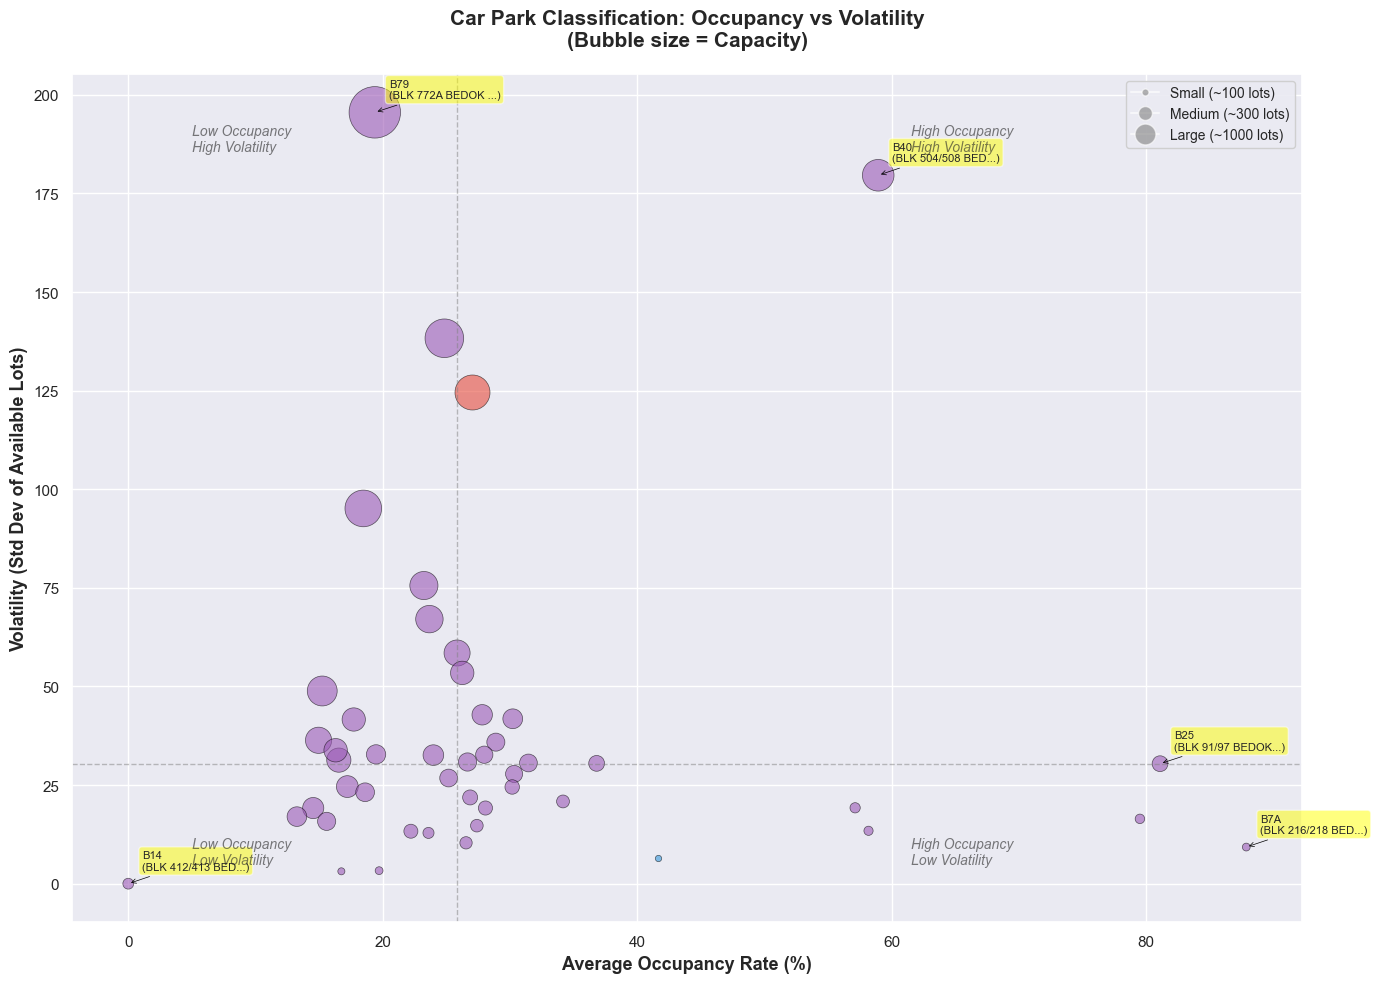

In [19]:
# Create figure
fig, ax = plt.subplots(figsize=(14, 10))

# Color mapping for agencies
agency_colors = {
    'HDB': '#9B59B6',  # Purple
    'LTA': '#E74C3C',  # Red
    'URA': '#3498DB'   # Blue
}

# Plot each agency separately for legend
for agency in stats_df['agency'].unique():
    agency_data = stats_df[stats_df['agency'] == agency]
    
    ax.scatter(
        agency_data['average_occupancy_rate (%)'],
        agency_data['std_available_lots'],
        s=agency_data['capacity_estimation'],  # Size by capacity
        alpha=0.6,
        c=agency_colors.get(agency, '#95A5A6'),
        label=f'{agency} ({len(agency_data)} car parks)',
        edgecolors='black',
        linewidth=0.5
    )

# Add labels for interesting points
# Label the 5 most extreme points
extreme_points = pd.concat([
    stats_df.nlargest(2, 'std_available_lots'),  # Most volatile
    stats_df.nlargest(2, 'average_occupancy_rate (%)'),  # Busiest
    stats_df.nsmallest(1, 'average_occupancy_rate (%)')  # Least busy
])

for _, row in extreme_points.iterrows():
    ax.annotate(
        f"{row['carpark_id']}\n({row['development'][:15]}...)",
        xy=(row['average_occupancy_rate (%)'], row['std_available_lots']),
        xytext=(10, 10),
        textcoords='offset points',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='black', lw=0.5)
    )

# Add quadrant lines
median_occ = stats_df['average_occupancy_rate (%)'].median()
median_vol = stats_df['std_available_lots'].median()

ax.axvline(median_occ, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax.axhline(median_vol, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Add quadrant labels
ax.text(5, stats_df['std_available_lots'].max() * 0.95, 'Low Occupancy\nHigh Volatility',
        fontsize=10, alpha=0.6, style='italic')
ax.text(stats_df['average_occupancy_rate (%)'].max() * 0.7, stats_df['std_available_lots'].max() * 0.95, 
        'High Occupancy\nHigh Volatility',
        fontsize=10, alpha=0.6, style='italic')
ax.text(5, 5, 'Low Occupancy\nLow Volatility',
        fontsize=10, alpha=0.6, style='italic')
ax.text(stats_df['average_occupancy_rate (%)'].max() * 0.7, 5, 'High Occupancy\nLow Volatility',
        fontsize=10, alpha=0.6, style='italic')

# Labels and title
ax.set_xlabel('Average Occupancy Rate (%)', fontsize=13, fontweight='bold')
ax.set_ylabel('Volatility (Std Dev of Available Lots)', fontsize=13, fontweight='bold')
ax.set_title('Car Park Classification: Occupancy vs Volatility\n(Bubble size = Capacity)', 
             fontsize=15, fontweight='bold', pad=20)

# Legend
legend = ax.legend(loc='upper right', fontsize=11, framealpha=0.9)
legend.set_title('Agency', prop={'size': 12, 'weight': 'bold'})

# Add size legend
from matplotlib.lines import Line2D
size_legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Small (~100 lots)',
           markerfacecolor='gray', markersize=5, alpha=0.6),
    Line2D([0], [0], marker='o', color='w', label='Medium (~300 lots)',
           markerfacecolor='gray', markersize=10, alpha=0.6),
    Line2D([0], [0], marker='o', color='w', label='Large (~1000 lots)',
           markerfacecolor='gray', markersize=15, alpha=0.6),
]
ax.legend(handles=legend.get_patches() + size_legend_elements, 
          loc='upper right', fontsize=10, framealpha=0.9)

# Grid
ax.grid(True, alpha=1)

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
# Print insights
print(f"\na. KEY INSIGHTS:")
print(f"• Median occupancy: {median_occ:.2f}%")
print(f"• Median volatility: {median_vol:.2f} lots")

# Identify quadrants
high_occ_high_vol = stats_df[(stats_df['average_occupancy_rate (%)'] > median_occ) & (stats_df['std_available_lots'] > median_vol)]
high_occ_low_vol = stats_df[(stats_df['average_occupancy_rate (%)'] > median_occ) & (stats_df['std_available_lots'] <= median_vol)]
low_occ_high_vol = stats_df[(stats_df['average_occupancy_rate (%)'] <= median_occ) & (stats_df['std_available_lots'] > median_vol)]
low_occ_low_vol = stats_df[(stats_df['average_occupancy_rate (%)'] <= median_occ) & (stats_df['std_available_lots'] <= median_vol)]

print(f"\nb. QUADRANT DISTRIBUTION:")
print(f"• High Occupancy, High Volatility: {len(high_occ_high_vol)} car parks (Busy & Unpredictable)")
print(f"• High Occupancy, Low Volatility: {len(high_occ_low_vol)} car parks (Busy & Stable)")
print(f"• Low Occupancy, High Volatility: {len(low_occ_high_vol)} car parks (Underutilized & Variable)")
print(f"• Low Occupancy, Low Volatility: {len(low_occ_low_vol)} car parks (Underutilized & Stable)")

print(f"\nc. INTERPRETATION:")
print(f"• High Volatility car parks are harder to predict")
print(f"• High Occupancy car parks may need capacity expansion")
print(f"• Low Occupancy car parks might be oversized or poorly located")
print(f"• Bubble size shows capacity - larger = more spaces")



a. KEY INSIGHTS:
• Median occupancy: 25.84%
• Median volatility: 30.42 lots

b. QUADRANT DISTRIBUTION:
• High Occupancy, High Volatility: 10 car parks (Busy & Unpredictable)
• High Occupancy, Low Volatility: 13 car parks (Busy & Stable)
• Low Occupancy, High Volatility: 13 car parks (Underutilized & Variable)
• Low Occupancy, Low Volatility: 11 car parks (Underutilized & Stable)

c. INTERPRETATION:
• High Volatility car parks are harder to predict
• High Occupancy car parks may need capacity expansion
• Low Occupancy car parks might be oversized or poorly located
• Bubble size shows capacity - larger = more spaces


1.3 Hour-of-day pattern using heatmap

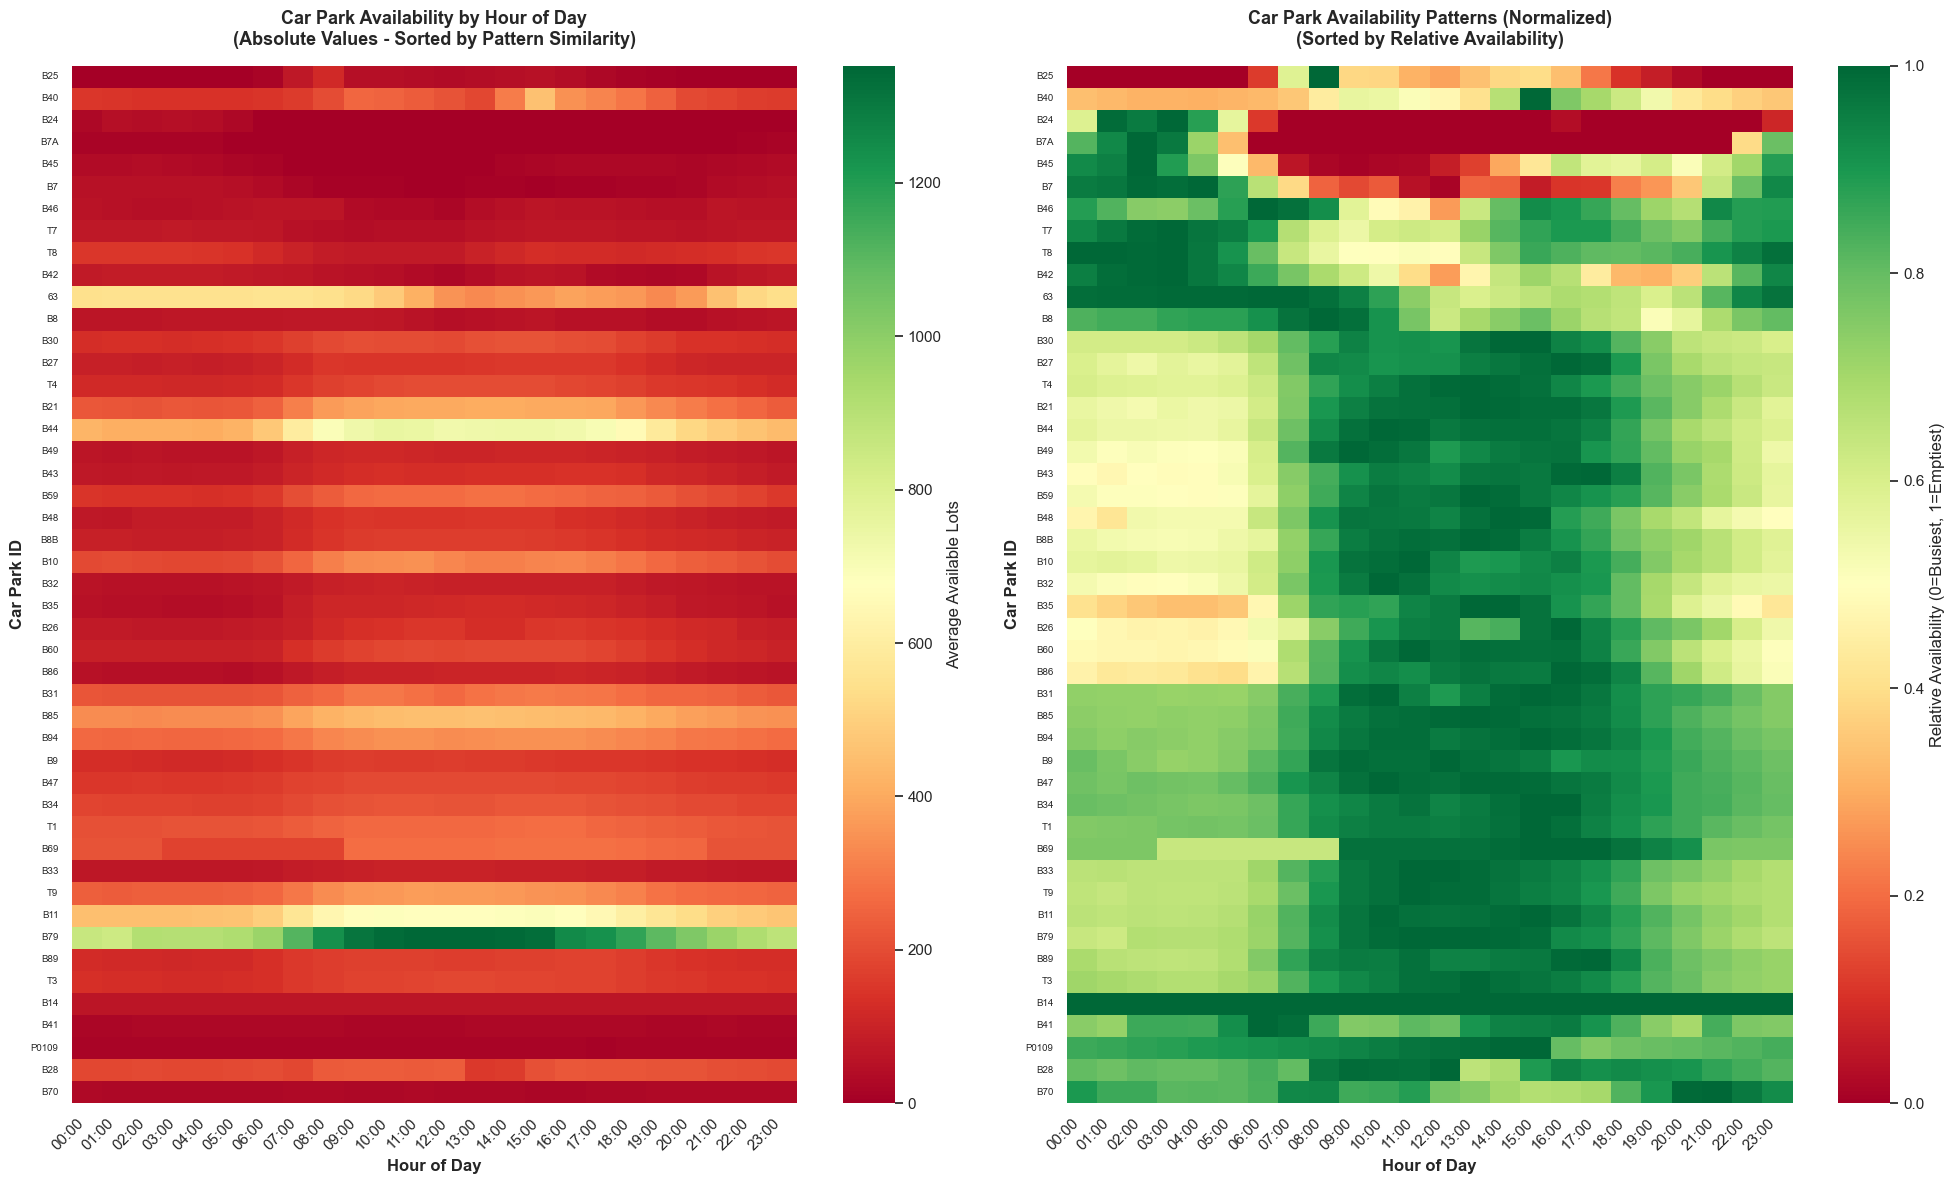

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram

temp_df = resampled_df.copy()
temp_df["hour"] = temp_df["timestamp"].dt.hour

hourly_average = temp_df.pivot_table(
    values='available_lots',
    index='carpark_id',
    columns='hour',
    aggfunc='mean'
)

# Normalize by row (each car park's pattern relative to its own range)
# This helps compare patterns regardless of capacity
hourly_normalized = hourly_average.div(hourly_average.max(axis=1), axis=0)

# Perform hierarchical clustering to sort car parks by similarity
linkage_matrix = linkage(hourly_normalized.fillna(0), method='ward')

dendro = dendrogram(linkage_matrix, no_plot=True)
order = dendro['leaves']

# Reorder the dataframe
hourly_sorted = hourly_average.iloc[order]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

sns.heatmap(
    hourly_sorted,
    cmap='RdYlGn',
    ax=ax1,
    cbar_kws={'label': 'Average Available Lots'},
    linewidths=0,
    yticklabels=True,
    xticklabels=True
)

ax1.set_title('Car Park Availability by Hour of Day\n(Absolute Values - Sorted by Pattern Similarity)', 
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax1.set_ylabel('Car Park ID', fontsize=12, fontweight='bold')

# Make x-axis labels more readable
ax1.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=7)

hourly_normalized_sorted = hourly_normalized.iloc[order]

sns.heatmap(
    hourly_normalized_sorted,
    cmap='RdYlGn',
    ax=ax2,
    cbar_kws={'label': 'Relative Availability (0=Busiest, 1=Emptiest)'},
    linewidths=0,
    yticklabels=True,
    xticklabels=True,
    vmin=0,
    vmax=1
)

ax2.set_title('Car Park Availability Patterns (Normalized)\n(Sorted by Relative Availability)', 
              fontsize=13, fontweight='bold', pad=15)
ax2.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax2.set_ylabel('Car Park ID', fontsize=12, fontweight='bold')

ax2.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=7)

# Add annotations for pattern types
# Identify peak hours for each car park
peak_hours = hourly_normalized_sorted.idxmin(axis=1)  # Hour with lowest availability (busiest)

morning_peak = (peak_hours >= 7) & (peak_hours <= 10)
afternoon_peak = (peak_hours >= 11) & (peak_hours <= 15)
evening_peak = (peak_hours >= 16) & (peak_hours <= 20)
night_stable = (peak_hours >= 21) | (peak_hours <= 6)

plt.tight_layout()

In [22]:
print(f"\na. PEAK HOUR DISTRIBUTION:")
print(f"Morning peak (7-10am): {morning_peak.sum()} car parks")
print(f"Afternoon peak (11-3pm): {afternoon_peak.sum()} car parks")
print(f"Evening peak (4-8pm): {evening_peak.sum()} car parks")
print(f"Night/stable (9pm-6am): {night_stable.sum()} car parks")


a. PEAK HOUR DISTRIBUTION:
Morning peak (7-10am): 3 car parks
Afternoon peak (11-3pm): 6 car parks
Evening peak (4-8pm): 4 car parks
Night/stable (9pm-6am): 34 car parks


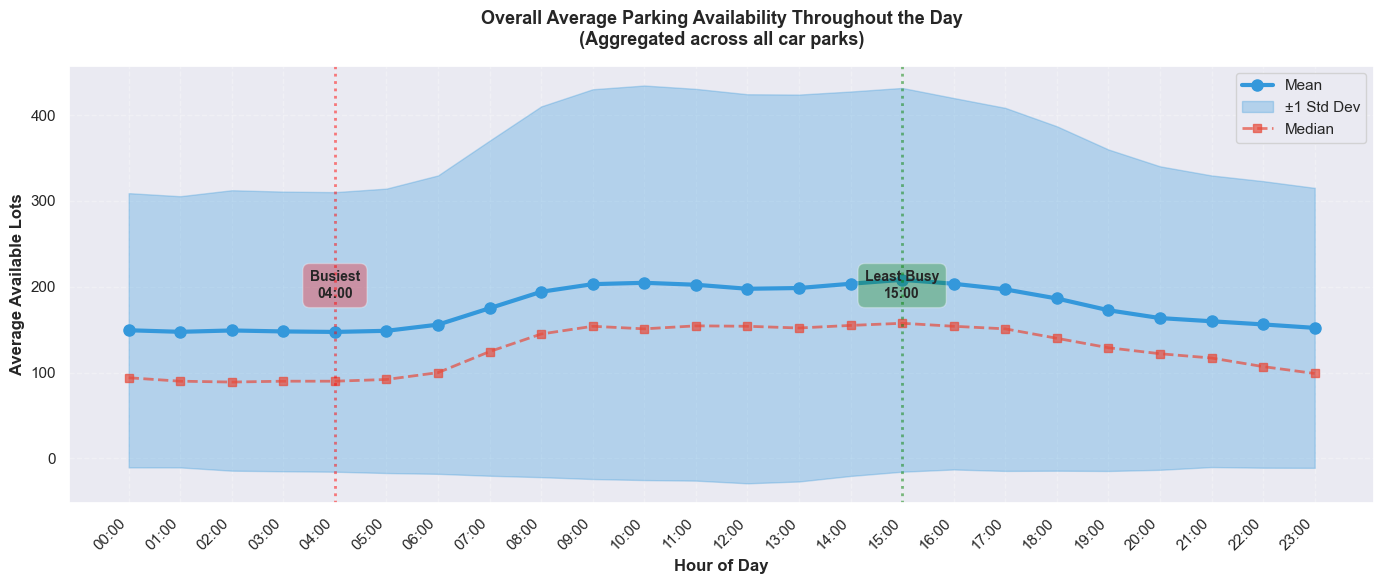

In [23]:
fig2, ax3 = plt.subplots(figsize=(14, 6))

# Calculate overall average by hour (across all car parks)
overall_hourly = temp_df.groupby('hour')['available_lots'].agg(['mean', 'std', 'median'])

# Plot
ax3.plot(overall_hourly.index, overall_hourly['mean'], 
         linewidth=3, marker='o', markersize=8, label='Mean', color='#3498DB')
ax3.fill_between(overall_hourly.index, 
                 overall_hourly['mean'] - overall_hourly['std'],
                 overall_hourly['mean'] + overall_hourly['std'],
                 alpha=0.3, color='#3498DB', label='±1 Std Dev')
ax3.plot(overall_hourly.index, overall_hourly['median'], 
         linewidth=2, linestyle='--', marker='s', markersize=6, 
         label='Median', color='#E74C3C', alpha=0.7)

# Styling
ax3.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax3.set_ylabel('Average Available Lots', fontsize=12, fontweight='bold')
ax3.set_title('Overall Average Parking Availability Throughout the Day\n(Aggregated across all car parks)', 
              fontsize=13, fontweight='bold', pad=15)
ax3.set_xticks(range(24))
ax3.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.legend(fontsize=11, loc='best')

# Highlight peak hours
# Ensure the hour values are converted to numeric (int/float) before passing to plotting functions
busiest_hour = overall_hourly['mean'].idxmin()
emptiest_hour = overall_hourly['mean'].idxmax()

# Convert to float for plotting (matplotlib expects numeric x positions)
busiest_hour_f = float(busiest_hour)
emptiest_hour_f = float(emptiest_hour)

ax3.axvline(busiest_hour_f, color='red', linestyle=':', alpha=0.5, linewidth=2)
ax3.axvline(emptiest_hour_f, color='green', linestyle=':', alpha=0.5, linewidth=2)

# Use int() for formatting in text labels, but pass floats for the x coordinate
ax3.text(busiest_hour_f, overall_hourly['mean'].max() * 0.9, 
         f'Busiest\n{int(busiest_hour):02d}:00', 
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='red', alpha=0.3))
ax3.text(emptiest_hour_f, overall_hourly['mean'].max() * 0.9, 
         f'Least Busy\n{int(emptiest_hour):02d}:00', 
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='green', alpha=0.3))

plt.tight_layout()

In [24]:
print(f"\na. OVERALL HOURLY INSIGHTS:")
print(f"   Busiest hour: {busiest_hour:02d}:00 (Avg: {overall_hourly.loc[busiest_hour, 'mean']:.0f} lots available)")
print(f"   Least busy hour: {emptiest_hour:02d}:00 (Avg: {overall_hourly.loc[emptiest_hour, 'mean']:.0f} lots available)")
print(f"   Difference: {overall_hourly.loc[emptiest_hour, 'mean'] - overall_hourly.loc[busiest_hour, 'mean']:.0f} lots")


a. OVERALL HOURLY INSIGHTS:
   Busiest hour: 04:00 (Avg: 147 lots available)
   Least busy hour: 15:00 (Avg: 208 lots available)
   Difference: 61 lots


1.4 Geographic Map

In [30]:
import folium
from folium.plugins import MarkerCluster, HeatMap

# Validate coordinates
print(f"Longitude range: {stats_df['longitude'].min():.4f} to {stats_df['longitude'].max():.4f}")
print(f"Latitude range: {stats_df['latitude'].min():.4f} to {stats_df['latitude'].max():.4f}")

# Calculate map center
map_center = [stats_df['latitude'].mean(), stats_df['longitude'].mean()]

# Create base map
carpark_map = folium.Map(
    location=map_center, 
    zoom_start=12,
    tiles='OpenStreetMap'
)

# Add marker cluster
marker_cluster = MarkerCluster(name='Car Parks').add_to(carpark_map)

# Add markers
for idx, row in stats_df.iterrows():
    # Color coding based on occupancy
    if row['average_occupancy_rate (%)'] >= 30.2:
        color = 'red'
        status = 'High Demand'
    elif row['average_occupancy_rate (%)'] >= 25.85:
        color = 'orange'
        status = 'Upper-Medium Demand'
    elif row['average_occupancy_rate (%)'] >= 18.55:
        color = 'blue'
        status = 'Low-Medium Demand'
    else:
        color = 'green'
        status = 'Low Demand'
    
    popup_text = f"""
    <div style="font-family: Arial; width: 250px;">
        <h4 style="margin: 0 0 10px 0;">{row['development']}</h4>
        <table style="width: 100%; font-size: 12px;">
            <tr><td><b>Carpark ID:</b></td><td>{row['carpark_id']}</td></tr>
            <tr><td><b>Agency:</b></td><td>{row['agency']}</td></tr>
            <tr><td colspan="2"><hr style="margin: 5px 0;"></td></tr>
            <tr><td><b>Status:</b></td><td><span style="color: {color};">{status}</span></td></tr>
            <tr><td><b>Capacity:</b></td><td>{row['capacity_estimation']} lots</td></tr>
            <tr><td><b>Avg Occupied:</b></td><td>{row['average_occupancy']:.0f} lots</td></tr>
            <tr><td><b>Occupancy Rate:</b></td><td>{row['average_occupancy_rate (%)']:.1f}%</td></tr>
            <tr><td colspan="2"><hr style="margin: 5px 0;"></td></tr>
            <tr><td><b>Volatility:</b></td><td>{row['std_available_lots']:.1f}</td></tr>
            <tr><td><b>Peak Hour:</b></td><td>{row['peak_hour']:02d}:00</td></tr>
        </table>
    </div>
    """
    
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=f"{row['development']} - {row['average_occupancy_rate (%)']:.0f}%",
        icon=folium.Icon(color=color, icon='car', prefix='fa')
    ).add_to(marker_cluster)

# Add legend
legend_html = '''
<div style="position: fixed; 
     top: 10px; right: 10px; width: 220px; 
     border:2px solid grey; z-index:9999; font-size:13px;
     background-color: white; padding: 12px; border-radius: 5px;
     box-shadow: 2px 2px 6px rgba(0,0,0,0.3);">
     <p style="margin: 0 0 10px 0; font-size: 15px;"><b>🅿️ Occupancy Rate</b></p>
     <p style="margin: 5px 0;"><i class="fa fa-map-marker fa-2x" style="color:green"></i> Low (&lt;50%)</p>
     <p style="margin: 5px 0;"><i class="fa fa-map-marker fa-2x" style="color:orange"></i> Medium (50-80%)</p>
     <p style="margin: 5px 0;"><i class="fa fa-map-marker fa-2x" style="color:red"></i> High (&gt;80%)</p>
</div>
'''

# Add layer control
folium.LayerControl().add_to(carpark_map)

carpark_map

Longitude range: 103.9222 to 103.9498
Latitude range: 1.3248 to 1.3846
